In [1]:
# Simple script for testing the energy price data before
# combining it with the Cambridge energy use for energy cost.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(
    rc={"figure.figsize":(10, 6.5), 
        "figure.subplot.left":0.10,
        "figure.subplot.right":0.95,
        "figure.subplot.top":0.92,
        }
    )

In [3]:
# Load in the data from parent dir: /datasets/xxx.csv
df_source = pd.read_csv(
    '../datasets/Average_retail_price_of_electricity.csv', 
    skiprows=4
)

In [4]:
# Clean the data and get into a standard dataframe format
df = df_source.T
df.columns = df.iloc[0]
df.drop([
    'description', 
    'units', 
    'source key'], 
    inplace=True
)
df = df.dropna(axis=1)
df['date'] = [pd.to_datetime(x, format="%b %Y") for x in df.index]

#df['date'] = [pd.to_datetime(x, format="%b-%y") for x in df.index] # if edited in excel
df.tail()

description,United States : industrial,date
Jul 2022,9.41,2022-07-01
Aug 2022,9.51,2022-08-01
Sep 2022,9.34,2022-09-01
Oct 2022,8.61,2022-10-01
Nov 2022,8.3,2022-11-01


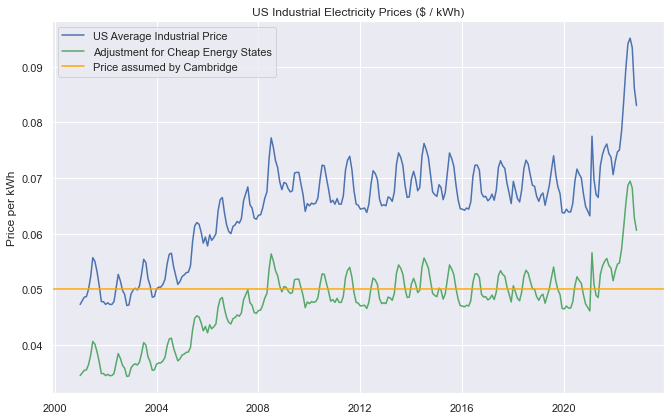

In [9]:
# Generate a line plot of US Industrial electricity prices

sns.lineplot(
    x=df['date'], 
    y=df['United States : industrial']/100,
    label = 'US Average Industrial Price'
) # Unmodified US industrial price

sns.lineplot(
    x=df['date'], 
    y=df['United States : industrial']/100*0.73,
    label = 'Adjustment for Cheap Energy States',
    color = 'g'
) # Price discounted to match Cambridge assumptions

plt.axhline(
    y = 0.05, 
    color='orange', 
    label='Price assumed by Cambridge'
) # Cambridige assumed price

plt.title('US Industrial Electricity Prices ($ / kWh)')
plt.xlabel('')
plt.ylabel('Price per kWh')
plt.legend(loc='upper left')

plt.savefig(
    '../tmp-figures/electricity-rates.png', 
    transparent=False, 
    facecolor='w',
    dpi = 200
)
plt.show()

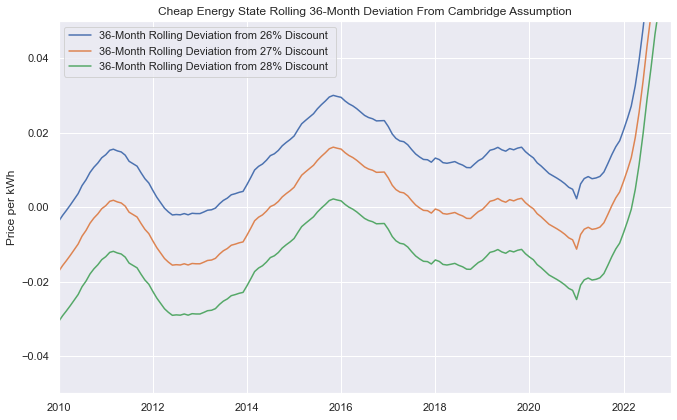

In [10]:
# Let's test out some different price discounts to see if the 27% assumption is valid

sns.lineplot(
    x=df['date'], 
    y=(df['United States : industrial'].rolling(36).mean()/100*0.74)/0.05 - 1,
    label = '36-Month Rolling Deviation from 26% Discount ',
) # Too small of a discount

sns.lineplot(
    x=df['date'], 
    y=(df['United States : industrial'].rolling(36).mean()/100*0.73)/0.05 - 1,
    label = '36-Month Rolling Deviation from 27% Discount ',
) # Best discount

sns.lineplot(
    x=df['date'], 
    y=(df['United States : industrial'].rolling(36).mean()/100*0.72)/0.05 - 1,
    label = '36-Month Rolling Deviation from 28% Discount ',
) # Too large of a discount

plt.title('Cheap Energy State Rolling 36-Month Deviation From Cambridge Assumption')
plt.xlabel('')
plt.ylabel('Price per kWh')
plt.legend(loc='upper left')
plt.xlim([pd.to_datetime('2010-01-01'), pd.to_datetime('2023-01-01')])
plt.ylim([-0.05, 0.05])

plt.savefig(
    '../tmp-figures/electricity-discount-validation.png', 
    transparent=False, 
    facecolor='w',
    dpi = 200
)
plt.show()